In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_and_print_matrix_csv(file_path):
    matrix = []
    
    with open(file_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            matrix.append(row)
    
    for row in matrix:
        print(" ".join(row))

MFCC plotting: x axis = time frames; y axis = cepstral coefficients

In [21]:
def plot_MFCC(mfcc_values, title):
		
	plt.figure(figsize=(14, 5))
	plt.imshow(mfcc_values, cmap='rainbow', aspect='auto', interpolation = "none", origin='lower')

	# Add labels and title
	plt.xlabel('samples in time')
	plt.ylabel('MFCC coefficients')
	plt.title(title)

	# Show colorbar
	plt.colorbar(label='MFCC Values')
	plt.show()

MFCC coefficients plots with different normalizations and transformations


In [22]:
#MFCC COEFFICIENT WITHOUT ANY TRANSFORMATION (FLOAT VALUES)

file_path_1 = 'mfcc_test_float.csv'
#read_matrix_csv(file_path_1)


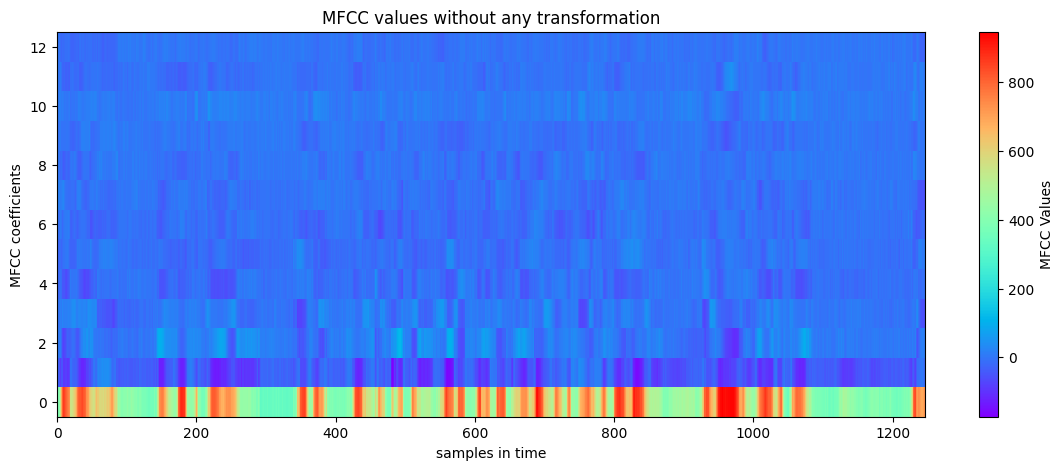

In [23]:
#MFCC COEFFICIENT WITHOUT ANY TRANSFORMATION (FLOAT VALUES)

df = pd.read_csv(file_path_1, header=None)

# Extract MFCC values as a NumPy array and transpose the matrix
mfcc_values = (df.values).T

plot_MFCC(mfcc_values, title='MFCC values without any transformation')


Histogram plot of the data distribution for each MFCC feature

/home/simon/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


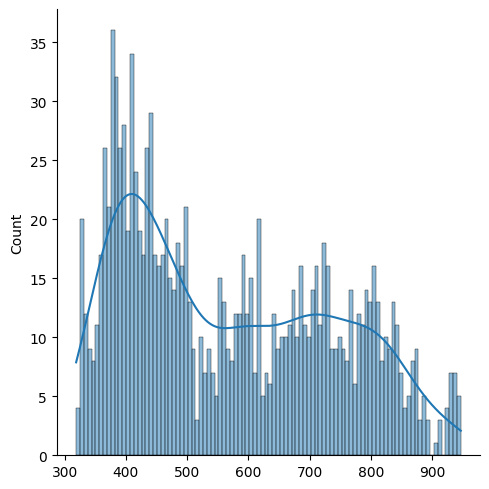

In [24]:
# plot the data distribution of MFCC values for the first row in mfcc_values matrix
import seaborn as sns
sns.displot(mfcc_values[0], bins=100, kde=True)


In [25]:
#MFCC COEFFICIENT NORMALIZED WITH ZSCORE TECHNIQUE (SUBTRACTING THE MEAN AND DIVIDING FOR THE VARIANCE)

file_path_2 = 'mfcc_test_norm_float.csv'
#read_and_print_matrix_csv(file_path_2)


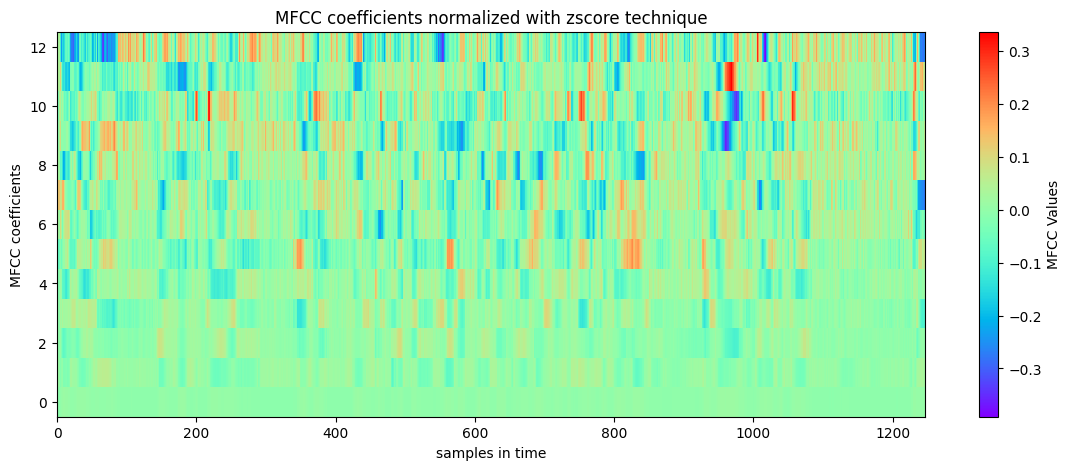

In [26]:
#MFCC COEFFICIENT NORMALIZED WITH ZSCORE TECHNIQUE (SUBTRACTING THE MEAN AND DIVIDING FOR THE VARIANCE)

df = pd.read_csv(file_path_2, header=None)

mfcc_values = (df.values).T

plot_MFCC(mfcc_values, title='MFCC coefficients normalized with zscore technique')


/home/simon/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


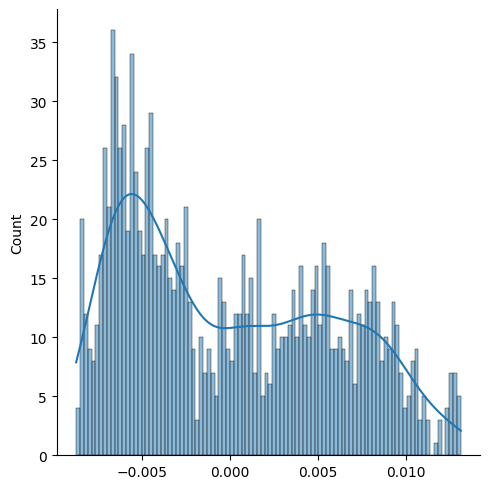

In [27]:
sns.displot(mfcc_values[0], bins=100, kde=True)

In [28]:
#MFCC COEFFICIENT QUANTIZED USING MIN MAX TECHNIQUE AFTER NORMALIZATION

file_path_3 = 'mfcc_test_int8.csv'
#read_and_print_matrix_csv(file_path_3)

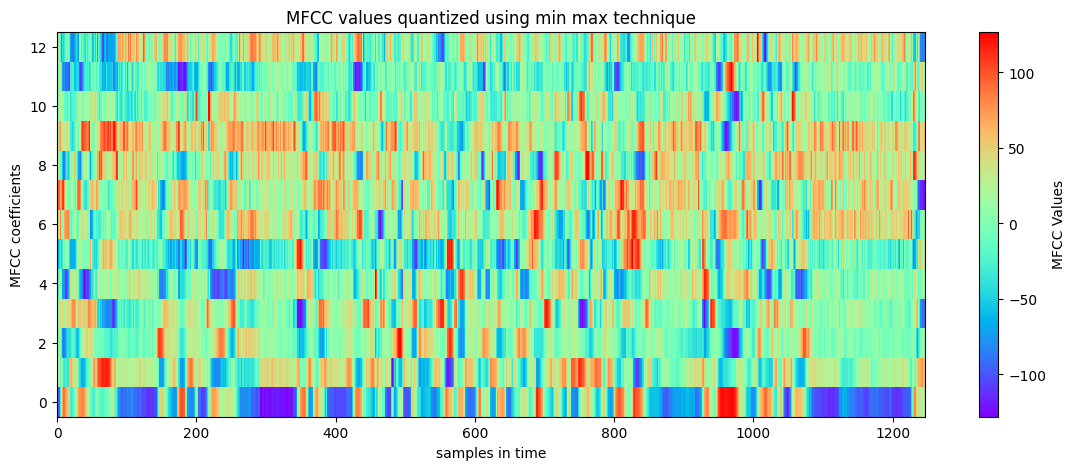

In [29]:
#MFCC COEFFICIENT QUANTIZED USING MIN MAX TECHNIQUE

df = pd.read_csv(file_path_3, header=None)
mfcc_values = (df.values).T 

plot_MFCC(mfcc_values, title = 'MFCC values quantized using min max technique')

/home/simon/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


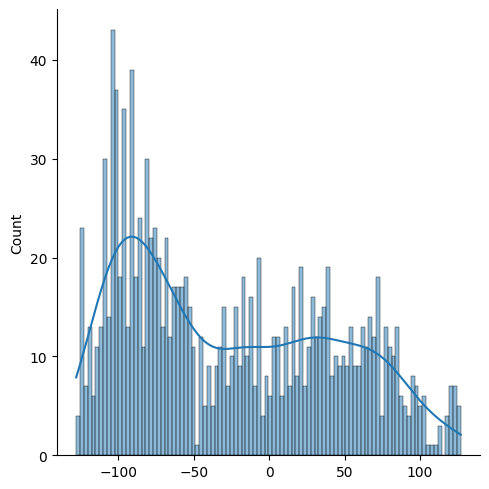

In [30]:
sns.displot(mfcc_values[0], bins=100, kde=True)

As the above plots show, the data distribution remains consistent in all 3 versions of the MFCC computed. This means that both the mean-variance normalization and min-max standardization algorithms work correctly.

Note that the transformation are applied coefficient-wise, meaning that each cepstrum coefficient has its own data distribution that is different from the other coefficients.